In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
df = pd.read_csv(r'C:/Users/Dell/OneDrive/Desktop/BlinkIT Grocery Data.csv')

In [8]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [12]:
df.shape

(8523, 12)

In [13]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [17]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [18]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


# Finding the duplicates

In [20]:
df.duplicated().sum()

np.int64(0)

# Finding the Nulls

In [21]:
df.isna().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

# Data Cleaning

In [3]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
print("\ Unique value in Item Fat Content after standardization")
print(df['Item Fat Content'].unique())

\ Unique value in Item Fat Content after standardization
['Regular' 'Low Fat']


# KPI Requirement

In [8]:
#Calculate Total Sales
total_sales = df['Sales'].sum()
#Calculate Average Sales
average_sales = df['Sales'].mean()
#Total Count of different items sold
number_of_items_sold = df['Sales'].count()
#Calculate Average Rating
average_rating = df['Rating'].mean()

#displayKPI
print(f"Total Sales: {total_sales:.2f}")
print(f"Average Sales: {average_sales:.2f}")
print("Number of Items Sold: {number_of_items_sold}")
print(f"Average Rating: {average_rating:.2f}") 

Total Sales: 1201681.49
Average Sales: 140.99
Number of Items Sold: {number_of_items_sold}
Average Rating: 3.97


# Charts Reuirements


# Total Sales by Fat Content (Donut Chart)

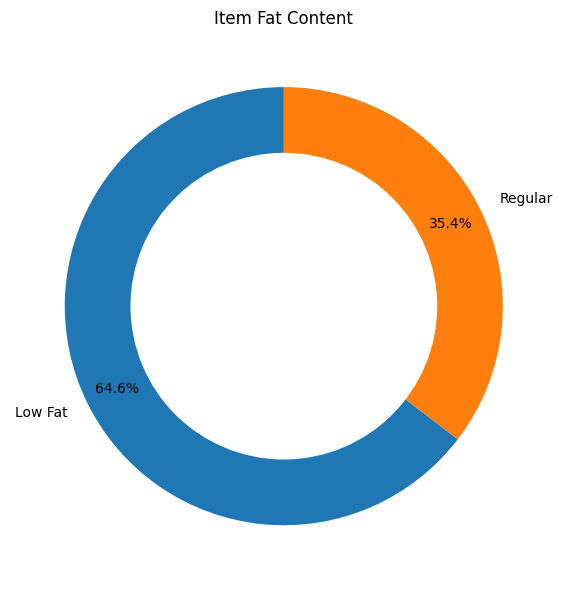

In [9]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(sales_by_fat, labels=sales_by_fat.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Item Fat Content')
plt.tight_layout()
plt.show()

# Total Sales by Item Chart (Bar Chart)

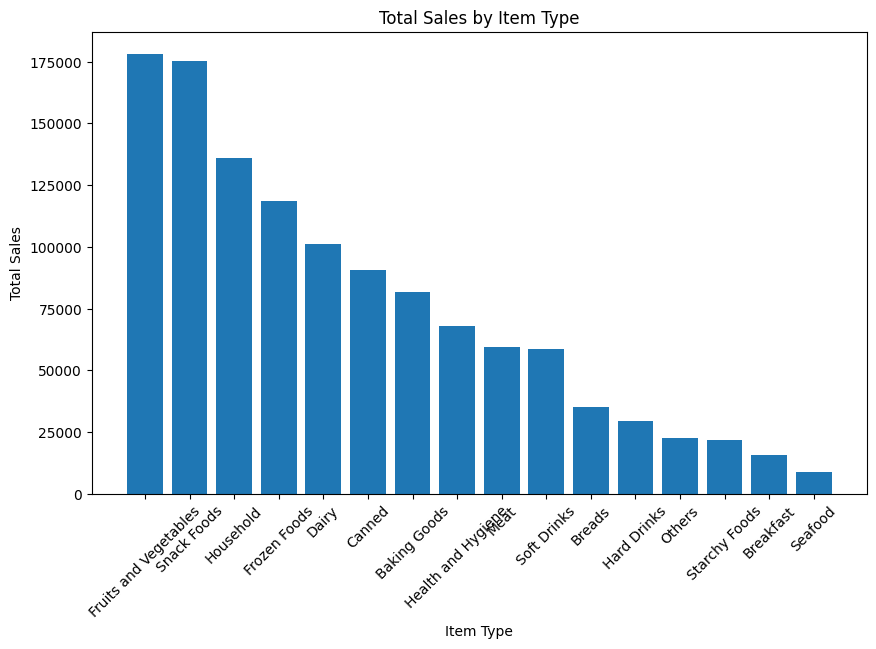

In [9]:
Sales_by_Type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))  # wider chart
plt.bar(sales_by_item_type.index, sales_by_item_type.values)
plt.xlabel("Item Type")
plt.ylabel("Total Sales")
plt.title("Total Sales by Item Type")
plt.xticks(rotation=45)
plt.show()


# Fat Content by outlet tier for total sales(cluster bar chart)

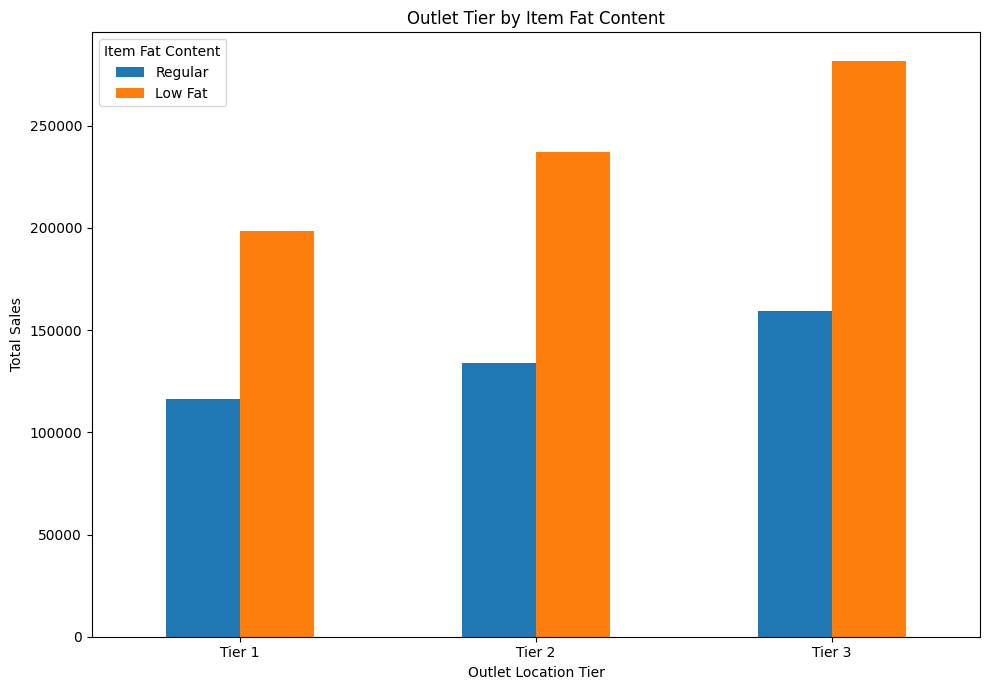

In [13]:
grouped = df.groupby(['Outlet Location Type' ,'Item Fat Content'])['Sales'].sum().unstack('Item Fat Content')  
grouped = grouped[['Regular', 'Low Fat']]  

grouped.plot(kind='bar', figsize=(10,7))  
plt.xlabel('Outlet Location Tier')  
plt.ylabel('Total Sales')  
plt.title('Outlet Tier by Item Fat Content')  
plt.xticks(rotation=0)  
plt.legend(title='Item Fat Content')  
plt.tight_layout()  
plt.show()

# Total Sales by distribution (Line Chart)

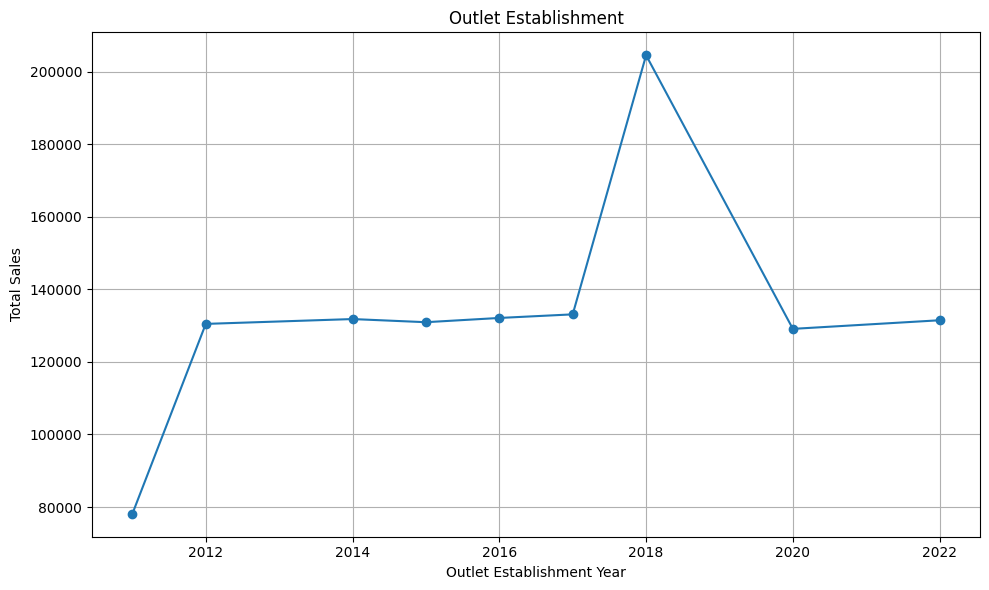

In [14]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(10,6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')
plt.grid(True)
plt.tight_layout()
plt.show()

# Sales by Outlet Size(Pie Chart)

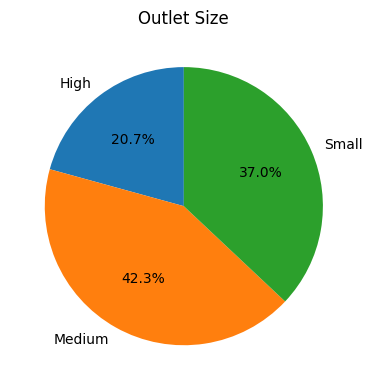

In [11]:
Sales_by_outlet_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize =(4,4))
plt.pie(Sales_by_outlet_size,labels = Sales_by_outlet_size.index, autopct = '%1.1f%%',startangle = 90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

# Sales by outlet location

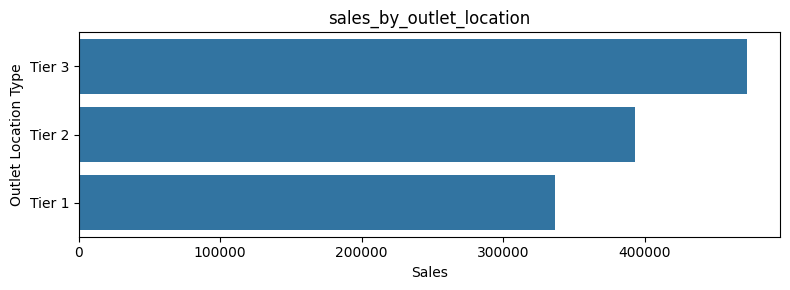

In [17]:
sales_by_outlet_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_outlet_location = sales_by_outlet_location.sort_values ('Sales',ascending = False) 

plt.figure(figsize = (8,3)) #Smaller height,enough width
ax= sns.barplot(x= 'Sales', y = 'Outlet Location Type', data = sales_by_outlet_location)
plt.xlabel('Sales')
plt.ylabel('Outlet Location Type')
plt.title('sales_by_outlet_location')
plt.tight_layout()
plt.show()


# All Matrix by Outlet Type

In [18]:
grouped_metrics = df.groupby('Outlet Type').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Rating': 'mean'})

grouped_metrics.columns = ['Total Sales', 'Average Sales', 'Number of Items', 'Average Rating']  
grouped_metrics = grouped_metrics.reset_index()  
  
print("\nMatrix Card: Key Metrics by Outlet Type")  
print(grouped_metrics)
    


Matrix Card: Key Metrics by Outlet Type
         Outlet Type  Total Sales  Average Sales  Number of Items  \
0      Grocery Store  151939.1490     140.294690             1083   
1  Supermarket Type1  787549.8928     141.213895             5577   
2  Supermarket Type2  131477.7764     141.678638              928   
3  Supermarket Type3  130714.6746     139.801791              935   

   Average Rating  
0        3.985873  
1        3.963242  
2        3.971228  
3        3.952941  


Display by Matrix Card